In [ ]:
import os
import sys
from google.colab import drive
drive.mount('/content/gdrive/')

sys.path.append('/content/gdrive/MyDrive/')



Mounted at /content/gdrive/


In [ ]:
from WGANGP_TF2 import WGANGP

In [ ]:
!cp -rf /content/gdrive/MyDrive/GANS/gan_ups .

In [ ]:
!cp /content/gdrive/MyDrive/artist.zip .
!unzip -q artist.zip
!rm artist.zip

In [ ]:
# !cp /content/gdrive/MyDrive/artist_64.zip .
# !unzip -q artist_64.zip
# !rm artist_64.zip

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import pickle
from pathlib import Path

import tensorflow as tf
import xml.etree.ElementTree as ET

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True

import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import cv2


In [ ]:
# run params
SECTION = 'gan_ups'
RUN_ID = '0001'
DATA_NAME = 'artist'
RUN_FOLDER = '/content/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.makedirs(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode = 'load' #'build' #

In [ ]:
IMAGE_SIZE = 128
BATCH_SIZE = 64

INPUT_DIM = (IMAGE_SIZE,IMAGE_SIZE,3)

In [ ]:
import pathlib
current_path = pathlib.Path().resolve()

DATA_FOLDER = current_path / pathlib.Path('/content/artist/wide') 
# DATA_FOLDER = current_path / pathlib.Path('/content/wide_64') 



In [ ]:
def loadImage(fPath, resize = True):
    img = cv2.imread(fPath)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # BGR to RGB
    return img

In [ ]:
imgs = [f for f in DATA_FOLDER.iterdir() if f.is_file()]
imgs = [loadImage(str(img_path)) for img_path in imgs]
x_train = np.array(imgs)
x_train = (x_train.astype('float32') - 127.5) / 127.5

In [ ]:
# data_gen = ImageDataGenerator(rescale=1./255)

# x_train = data_gen.flow_from_directory(DATA_FOLDER
#                                          , target_size = INPUT_DIM[:2]
#                                          , batch_size = BATCH_SIZE
#                                          , shuffle = True
#                                          , class_mode = 'input'
#                                          , subset = "training"
#                                             )



In [ ]:
# gan = WGANGP(input_dim = (IMAGE_SIZE,IMAGE_SIZE,3)
#         , critic_conv_filters = [64,128,256,512,1024]
#         , critic_conv_kernel_size = [5,5,5,5,5,5]
#         , critic_conv_strides = [2,2,2,2,2]
#         , critic_batch_norm_momentum = None
#         , critic_activation = 'leaky_relu'
#         , critic_dropout_rate = None
#         , critic_learning_rate = 0.0002
#         , generator_initial_dense_layer_size = (4, 4, 1024)
#         , generator_upsample = [1,1,1,1,1]
#         , generator_conv_filters = [512,256,128,64,3]
#         , generator_conv_kernel_size = [5,5,5,5,5]
#         , generator_conv_strides = [2,2,2,2,2]
#         , generator_batch_norm_momentum = 0.9
#         , generator_activation = 'leaky_relu'
#         , generator_dropout_rate = None
#         , generator_learning_rate = 0.0002
#         , optimiser = 'adam'
#         , grad_weight = 10
#         , z_dim = 100
#         , batch_size = BATCH_SIZE
#         )

gan = WGANGP(input_dim = (IMAGE_SIZE,IMAGE_SIZE,3)
        , critic_conv_filters = [64,128,256,512,1024]
        , critic_conv_kernel_size = [5,5,5,5,5,5]
        , critic_conv_strides = [2,2,2,2,2]
        , critic_batch_norm_momentum = None
        , critic_activation = 'leaky_relu'
        , critic_dropout_rate = None
        , critic_learning_rate = 0.0002
        , generator_initial_dense_layer_size = (4, 4, 1024)
        , generator_upsample = [2,2,2,2,2]
        , generator_conv_filters = [512,256,128,64,3]
        , generator_conv_kernel_size = [5,5,5,5,5]
        , generator_conv_strides = [2,2,2,2,2]
        , generator_batch_norm_momentum = 0.9
        , generator_activation = 'leaky_relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.0002
        , optimiser = 'adam'
        , grad_weight = 10
        , z_dim = 100
        , batch_size = BATCH_SIZE
        )

if mode == 'build':
    gan.save(RUN_FOLDER)

else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))


Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
import os, os.path

# simple version for working with CWD
path, dirs, files = next(os.walk("/content/wide_64"))
file_count = len(files)

StopIteration: ignored

In [ ]:
file_count

13823

In [ ]:
EPOCHS = 6000
PRINT_EVERY_N_BATCHES = 20
SAVE_EVERY_N_BATCHES = 100
N_CRITIC = 5
BATCH_SIZE = 64

# Nowa sekcja

In [ ]:
import re
mypath = '/content/gan_ups/0001_artist/weights/'
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

epochs_re = [re.search('weights-(.*).h5',file) for file in onlyfiles]
epochs_weights = [int(epoch.group(1)) if epoch is not None else 0 for epoch in epochs_re]
if len(epochs_weights) > 0:
  max_last_epoch = max(epochs_weights)
else:
  max_last_epoch = 0

In [ ]:
max_last_epoch

13100

In [ ]:
gan.train(x_train
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
    , save_every_n_batches = SAVE_EVERY_N_BATCHES
    , n_critic = N_CRITIC
    , using_generator = False
    , last_epoch = max_last_epoch
)

13100 (5, 1) [D loss: (-33.0)(R -149.3, F 107.0, G 0.9)] [G loss: -129.0]


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
14100 (5, 1) [D loss: (-20.2)(R -110.6, F 82.3, G 0.8)] [G loss: -89.2]
14101 (5, 1) [D loss: (-28.4)(R -135.9, F 99.6, G 0.8)] [G loss: -107.9]
14102 (5, 1) [D loss: (-26.0)(R -129.8, F 97.9, G 0.6)] [G loss: -89.2]
14103 (5, 1) [D loss: (-33.6)(R -133.9, F 91.5, G 0.9)] [G loss: -100.2]
14104 (5, 1) [D loss: (-33.4)(R -139.6, F 96.6, G 1.0)] [G loss: -97.5]
14105 (5, 1) [D loss: (-31.1)(R -111.8, F 72.9, G 0.8)] [G loss: -67.4]
14106 (5, 1) [D loss: (-31.7)(R -105.4, F 63.7, G 1.0)] [G loss: -76.2]
14107 (5, 1) [D loss: (-25.4)(R -129.8, F 90.6, G 1.4)] [G loss: -90.4]
14108 (5, 1) [D loss: (-31.7)(R -135.7, F 92.8, G 1.1)] [G loss: -105.1]
14109 (5, 1) [D loss: (-35.9)(R -147.4, F 100.0, G 1.1)] [G loss: -116.5]
14110 (5, 1) [D loss: (-29.6)(R -161.3, F 121.5, G 1.0)] [G loss: -146.2]
14111 (5, 1) [D loss: (-33.1)(R -154.2, F 112.9, G 0.8)] [G loss: -140.8]
14112 (5, 1) [D loss: (-34.7)(R -155.6, F 111.4, G 1.0)] [G lo

In [ ]:
!rm -rf /content/drive/MyDrive/GANS/run
!mv ./run /content/drive/MyDrive/GANS/

In [ ]:
!mv ./run /content/drive/MyDrive/GANS/

In [ ]:
!mv ./gan_ups /content/drive/MyDrive/GANS/

# Prez

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
for i in range(20):
  noise = np.random.normal(0, 1, (1, 100))
  gen_imgs = gan.generator.predict(noise)

  plt.imshow(gen_imgs[0])
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


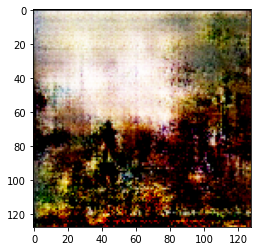

In [ ]:
noise = np.random.normal(0, 1, (1, 100))
gen_imgs = gan.generator.predict(noise)

plt.imshow(gen_imgs[0])